In [166]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import altair as alt
from vega_datasets import data as d
from altair import datum

In [167]:
data = pd.read_csv("student-por.csv", delimiter=";")
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [168]:
school = list(data['school'])
sex = list(data['sex'])
gp_m = 0
gp_f = 0
ms_m = 0
ms_f = 0
for i in range(len(school)):
    if sex[i] == "M" and school[i]== "GP":
        gp_m = gp_m + 1
    if sex[i] == "F" and school[i]== "GP":
        gp_f = gp_f + 1
    if sex[i] == "M" and school[i]== "MS":
        ms_m = ms_m + 1
    if sex[i] == "F" and school[i]== "MS":
        ms_f = ms_f + 1

df = pd.DataFrame({
    'school' :['GP', 'GP','MS', 'MS'],
    'sex': ['M','F','M','F'],
    'population': [gp_m,gp_f,ms_m,ms_f]
})
alt.Chart(df, title="The sex proportion of two school").mark_bar().encode(
    x='school',
    y='sum(population)',
    color='sex',
).properties(
    height=450,
    width=550
)

alt.Chart(...)

In [169]:
age = list(data['age'])
sex = list(data['sex'])

age_list = np.linspace(min(age), max(age), max(age) - min(age) + 1)
age_list = np.array(age_list, dtype="int32")
age_list = age_list.tolist()
m_list = np.zeros((max(age) - min(age) + 1), dtype="int32")
m_list = m_list.tolist()
f_list = np.zeros((max(age) - min(age) + 1), dtype="int32")
f_list = f_list.tolist()

for i in range(len(age)):
    if sex[i] == "M":
        for j in range(len(age_list)):
            if age_list[j] == age[i]:
                m_list[j] = m_list[j] + 1
    if sex[i] == "F":
        for j in range(len(age_list)):
            if age_list[j] == age[i]:
                f_list[j] = f_list[j] + 1

for i in range(len(age_list)):
    age_list.append(age_list[i])
sex_list = ["male","male","male","male","male","male","male","male","female","female","female","female","female","female","female","female",]
population = m_list
for i in range(len(f_list)):
    population.append(f_list[i])
for i in range(len(age_list)):
    age_list[i] = str(age_list[i])

df = pd.DataFrame({
    "age" : age_list,
    "sex": sex_list,
    "population": population})


alt.Chart(df, title="The distribution of the age of all the students").mark_bar().encode(
    x='sex:O',
    y='sum(population):Q',
    color='sex:N',
    column='age:N'
).properties(width=80,height=500)

alt.Chart(...)

In [170]:
school = list(data['school'])
g3 = list(data['G3'])
gp_grade = []
ms_grade = []
for i in range(len(school)):
    if school[i] == 'GP':
        gp_grade.append(g3[i])
    if school[i] == 'MS':
        ms_grade.append(g3[i])

df = pd.concat([pd.DataFrame({'GP': gp_grade}), pd.DataFrame({'MS':ms_grade})], axis=1)

alt.Chart(df, title="The distribution of G3 grades").transform_fold(
    ['GP', 'MS'],
    as_=['School', 'Measurement']
).mark_area(
    opacity=0.3,
    interpolate='step'
).encode(
    alt.X('Measurement:Q', title="G3 grades"),
    alt.Y('count()', stack=None, title="Count of population"),
    alt.Color('School:N')
).properties(
    width=500,
    height=500
)

alt.Chart(...)

In [171]:
m_edu = list(data['Medu'])
f_edu = list(data['Fedu'])
G3 = list(data['G3'])
level = []
for i in range(len(G3)):
    if G3[i] <= 6:
        level.append('disappointing')
    elif G3[i] <= 9:
        level.append('not bad')
    elif G3[i] <=12:
        level.append('good')
    elif G3[i] <=15:
        level.append('very good')
    elif G3[i] <=20:
        level.append('excellent')

df = pd.DataFrame({
    'G3': g3,
    'mother education': m_edu,
    'father education': f_edu,
    'level': level
})

alt.Chart(df, title="The G3 grades relationship with parents education").transform_window(
    index='count()'
).transform_fold(
    [ 'mother education','G3', 'father education']
).transform_joinaggregate(
     min='min(value)',
     max='max(value)',
     groupby=['key']
).transform_calculate(
    minmax_value=(datum.value-datum.min)/(datum.max-datum.min),
    mid=(datum.min+datum.max)/2
).mark_line(point=True).encode(
    alt.X('key:N', title="G3 grades", sort=[0,2,1]),
    # x='key:N',
    y='minmax_value:Q',
    detail='index:N',
    opacity=alt.value(0.5)
).properties(width=800, height=600).interactive()

alt.Chart(...)

In [172]:
m_job = list(data['Mjob'])
f_job = list(data['Fjob'])
g3 = list(data['G3'])

for i in range(len(m_job)):
    if m_job[i] == "other":
        m_job[i] = 0
    if m_job[i] == "at_home":
        m_job[i] = 1
    if m_job[i] == "services":
        m_job[i] = 2
    if m_job[i] == "health":
        m_job[i] = 3
    if m_job[i] == "teacher":
        m_job[i] = 4
for i in range(len(f_job)):
    if f_job[i] == "other":
        f_job[i] = 0
    if f_job[i] == "at_home":
        f_job[i] = 1
    if f_job[i] == "services":
        f_job[i] = 2
    if f_job[i] == "health":
        f_job[i] = 3
    if f_job[i] == "teacher":
        f_job[i] = 4

count_matrix = np.zeros((5,5), dtype="float64")
grade_matrix = np.zeros((5,5), dtype="float64")
t = np.array((['other', 'at home', 'services', 'health', 'teacher']))
x_m = np.array((['other', 'at home', 'services', 'health', 'teacher']))
for i in range(4):
    x_m = np.vstack([x_m, t])
y_f = x_m.T

for i in range(len(g3)):
    mother = m_job[i]
    father = f_job[i]
    count_matrix[father][mother] = count_matrix[father][mother] + 1
    grade_matrix[father][mother] = grade_matrix[father][mother] + g3[i]
for i in range(5):
    for j in range(5):
        grade_matrix[i][j] = grade_matrix[i][j] / count_matrix[i][j]

df = pd.DataFrame({'mother job': x_m.ravel(),
                     'father job': y_f.ravel(),
                     'average G3 grades': grade_matrix.ravel()})

alt.Chart(df, title="The G3 grades relationship with parents job").mark_rect().encode(
    x='mother job:O',
    y='father job:O',
    color='average G3 grades:Q'
).properties(
    width=600,
    height=600
)

alt.Chart(...)

In [173]:
absence = list(data['absences'])
g3 = list(data['G3'])
absence_list = []
for i in range(len(absence)):
    if absence[i] not in absence_list:
        absence_list.append(absence[i])
absence_list.sort()

count_list = np.zeros((len(absence_list),), dtype="int32")
count_list = count_list.tolist()
grade_list = np.zeros((len(absence_list),), dtype="float64")
grade_list = grade_list.tolist()

for i in range(len(absence)):
    index = absence[i]
    for j in range(len(absence_list)):
        if absence_list[j] == index:
            count_list[j] = count_list[j] + 1
            grade_list[j] = grade_list[j] + g3[i]
for i in range(len(grade_list)):
    grade_list[i] = grade_list[i] / count_list[i]

for i in range(len(absence_list)):
    absence_list[i] = str(absence_list[i])

df = pd.DataFrame({
    'Absence' :absence_list,
    'Average grades' :grade_list,
    'The number of student': count_list
})

alt.Chart(df, title="The relationship between absence and grades").mark_bar().encode(
    alt.X('Absence:N', title="Absence", sort=[0,2,1]),
    alt.Y('Average grades:Q',scale=alt.Scale(domain=[0,20])),
).properties(width=750,height=400)

alt.Chart(...)

In [174]:
alt.Chart(df, title="The absence times").mark_bar().encode(
    alt.X('Absence:N', title="Absence", sort=[0,2,1]),
    alt.Y('The number of student:Q'),
).properties(width=750,height=400)

alt.Chart(...)

In [175]:
study_time = list(data['studytime'])
g3 = list(data['G3'])
time_list = []
for i in range(len(study_time)):
    if study_time[i] not in time_list:
        time_list.append(study_time[i])
time_list.sort()

count_list = np.zeros((len(time_list),), dtype="int32")
count_list = count_list.tolist()
grade_list = np.zeros((len(time_list),), dtype="float64")
grade_list = grade_list.tolist()

for i in range(len(study_time)):
    for j in range(len(time_list)):
        if time_list[j] == study_time[i]:
            count_list[j] = count_list[j] + 1
            grade_list[j] = grade_list[j] + g3[i]

for i in range(len(grade_list)):
    grade_list[i] = grade_list[i] / count_list[i]

df = pd.DataFrame({
    'Study time':['<2h', '2 to 5 h', '5 to 10 h', '>10 h'],
    'Average grades': grade_list,
    'The number of student': count_list
})


alt.Chart(df, title="The relationship between study time and grades").mark_bar().encode(
    alt.X('Study time:N', title="Study time", sort=[0,2,1]),
    alt.Y('Average grades:Q'),
).properties(width=500,height=400)


alt.Chart(...)

In [176]:
alt.Chart(df, title="Study time of the students").mark_bar(point=True).encode(
    alt.X('Study time:O',sort=[0,1,2,3]),
    alt.Y('The number of student:Q'),
).properties(
    width=500,
    height=300
)

alt.Chart(...)

In [177]:

famrel = list(data['famrel'])
freetime = list(data['freetime'])
goout = list(data['goout'])
Walc = list(data['Walc'])
health = list(data['health'])
G3 = list(data['G3'])
level = []
for i in range(len(G3)):
    if G3[i] <= 6:
        level.append('disappointing')
    elif G3[i] <= 9:
        level.append('not bad')
    elif G3[i] <=12:
        level.append('good')
    elif G3[i] <=15:
        level.append('very good')
    elif G3[i] <=20:
        level.append('excellent')

df = pd.DataFrame({
    'family relationship': famrel,
    'freetime': freetime,
    'go out': goout,
    'alcohol': Walc,
    'health': health,
    'G3': G3,
    'level': level
})

df_disappointing = df.loc[df['level']=='disappointing']
df_not_bad = df.loc[df['level']=='not bad']
df_good = df.loc[df['level']=='good']
df_very_good = df.loc[df['level']=='very good']
df_excellent = df.loc[df['level']=='excellent']

fr = list(df_disappointing['family relationship'])
ft = list(df_disappointing['freetime'])
go = list(df_disappointing['go out'])
al = list(df_disappointing['alcohol'])
he = list(df_disappointing['health'])
g = list(df_disappointing['G3'])
fr1 = np.mean(fr)
ft1 = np.mean(ft)
go1 = np.mean(go)
al1 = np.mean(al)
he1 = np.mean(he)
g1 = np.mean(g)

fr = list(df_not_bad['family relationship'])
ft = list(df_not_bad['freetime'])
go = list(df_not_bad['go out'])
al = list(df_not_bad['alcohol'])
he = list(df_not_bad['health'])
g = list(df_not_bad['G3'])
fr2 = np.mean(fr)
ft2 = np.mean(ft)
go2 = np.mean(go)
al2 = np.mean(al)
he2 = np.mean(he)
g2 = np.mean(g)

fr = list(df_good['family relationship'])
ft = list(df_good['freetime'])
go = list(df_good['go out'])
al = list(df_good['alcohol'])
he = list(df_good['health'])
g = list(df_good['G3'])
fr3 = np.mean(fr)
ft3 = np.mean(ft)
go3 = np.mean(go)
al3 = np.mean(al)
he3 = np.mean(he)
g3 = np.mean(g)

fr = list(df_very_good['family relationship'])
ft = list(df_very_good['freetime'])
go = list(df_very_good['go out'])
al = list(df_very_good['alcohol'])
he = list(df_very_good['health'])
g = list(df_very_good['G3'])
fr4 = np.mean(fr)
ft4 = np.mean(ft)
go4 = np.mean(go)
al4 = np.mean(al)
he4 = np.mean(he)
g4 = np.mean(g)

fr = list(df_excellent['family relationship'])
ft = list(df_excellent['freetime'])
go = list(df_excellent['go out'])
al = list(df_excellent['alcohol'])
he = list(df_excellent['health'])
g = list(df_excellent['G3'])
fr5 = np.mean(fr)
ft5 = np.mean(ft)
go5 = np.mean(go)
al5 = np.mean(al)
he5 = np.mean(he)
g5 = np.mean(g)

level = ['disappointing', 'not bad', 'good', 'very good', 'excellent']

df = pd.DataFrame({
    'level': level,
    'family relationship': [fr1,fr2,fr3,fr4,fr5],
    'freetime': [ft1,ft2,ft3,ft4,ft5],
    'go out': [go1,go2,go3,go4,go5],
    'alcohol': [al1,al2,al3,al4,al5],
    'health': [he1,he2,he3,he4,he5],
})

df

,level,family relationship,freetime,go out,alcohol,health
0,disappointing,4.000000,3.650000,3.550000,3.050000,3.900000
1,not bad,3.787500,3.350000,3.325000,2.525000,3.487500
2,good,3.868132,3.216117,3.241758,2.432234,3.743590
3,very good,4.020619,3.103093,3.056701,2.030928,3.309278
4,excellent,4.048780,2.963415,3.073171,1.939024,3.341463


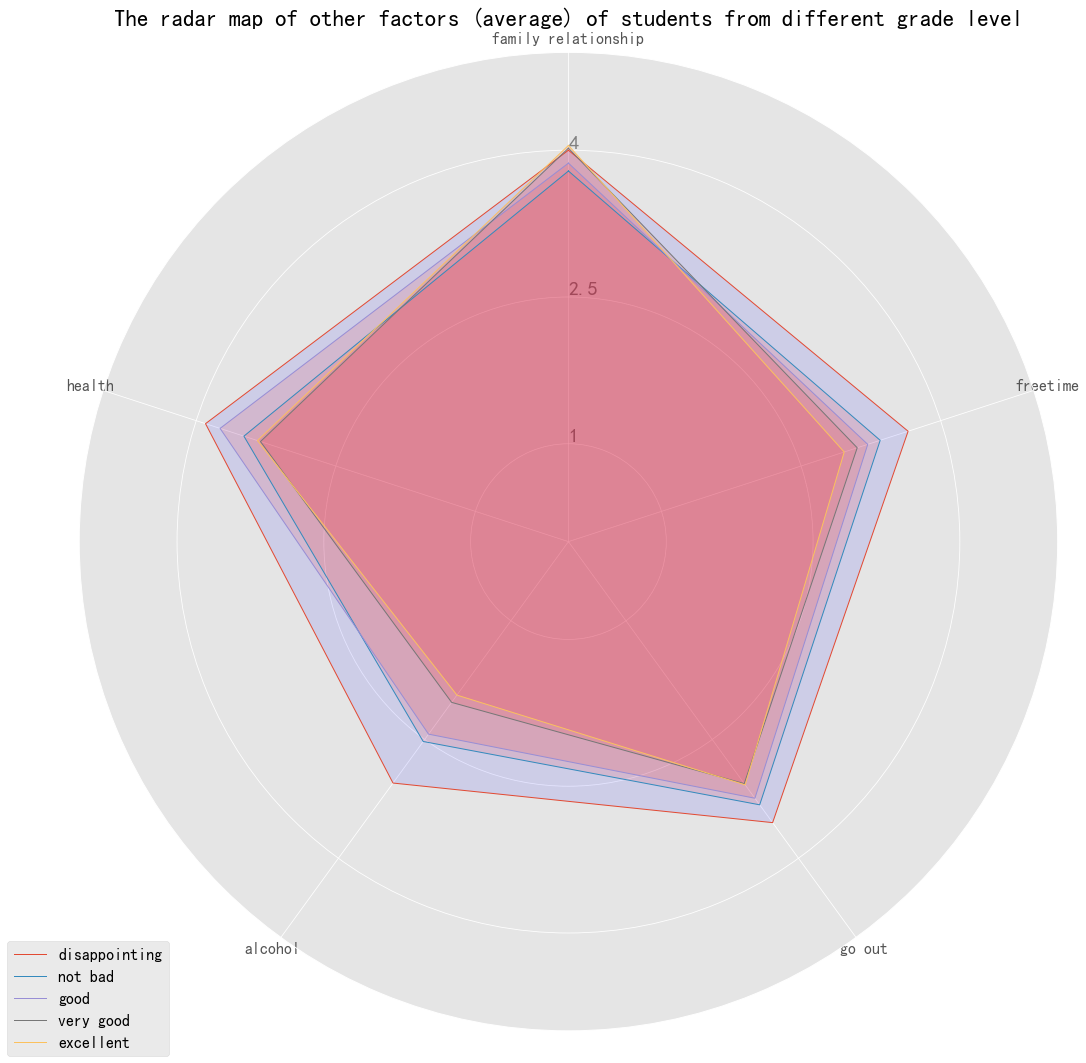

In [178]:

categories = list(df)[1:]

N = len(categories)


angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(18,18))
ax = plt.subplot(111, polar=True)


ax.set_theta_offset(pi / 2)

ax.set_theta_direction(-1)


plt.xticks(angles[:-1], categories)


ax.set_rlabel_position(0)
plt.yticks([1, 2.5, 4], ["1", "2.5", "4"], color="grey", size=20)
plt.ylim(0, 5)


values = df.loc[0].drop('level').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="disappointing")
ax.fill(angles, values, 'b', alpha=0.1)


values = df.loc[1].drop('level').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="not bad")
ax.fill(angles, values, 'r', alpha=0.1)

values = df.loc[2].drop('level').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="good")
ax.fill(angles, values, 'r', alpha=0.1)

values = df.loc[3].drop('level').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="very good")
ax.fill(angles, values, 'r', alpha=0.1)

values = df.loc[4].drop('level').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="excellent")
ax.fill(angles, values, 'r', alpha=0.1)

plt.title("The radar map of other factors (average) of students from different grade level")


plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()